<font size = 6>研究目标：不同驾驶习惯对于汽车电量损耗的影响

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import visuals as vs

my_data = pd.read_csv("123.csv", encoding = "gbk")
#老师提供的代码我一直跑不通，报错//的问题，但我明明输入的/，所以换了一种方式进行导入
%matplotlib inline

In [2]:
my_data.head()

,数据采集时间,行驶里程,动力系统就绪,紧急下电请求（0）,驱动电机速度,车速,电机控制器温度,驱动电机温度,电机母线电流,制动踏板状态,...,电池电量,剩余能量,电池总电压,单体最高温度,单体最低温度,单体最高电压,单体最低电压,绝缘电阻值,电池均衡激活,动力蓄电池包总数（1）
0,2014/1/14 15:51,14,1,0,1891,29.82,51,25,67.08,0,...,59.5,8.7,288.75,7.0,6.5,3.12,3.09,5162.5,0,1
1,2014/1/14 15:51,14,1,0,2613,42.07,46,25,-0.12,0,...,59.0,8.7,302.50,7.0,6.5,3.26,3.25,5072.5,0,1
2,2014/1/14 15:51,14,1,0,2576,40.79,55,25,65.33,0,...,59.0,8.7,287.75,7.0,6.5,3.12,3.09,5072.5,0,1
3,2014/1/14 15:51,14,1,0,2647,41.68,50,25,8.28,0,...,59.0,8.7,300.00,7.0,6.5,3.24,3.23,5070.0,0,1
4,2014/1/14 15:51,14,1,0,2801,44.24,51,26,43.00,0,...,59.0,8.7,293.25,7.0,6.5,3.16,3.14,5070.0,0,1


In [3]:
my_data = my_data.drop_duplicates(my_data.keys()[0])
my_data = my_data.reset_index(drop = True)
my_data.head()

,数据采集时间,行驶里程,动力系统就绪,紧急下电请求（0）,驱动电机速度,车速,电机控制器温度,驱动电机温度,电机母线电流,制动踏板状态,...,电池电量,剩余能量,电池总电压,单体最高温度,单体最低温度,单体最高电压,单体最低电压,绝缘电阻值,电池均衡激活,动力蓄电池包总数（1）
0,2014/1/14 15:51,14,1,0,1891,29.82,51,25,67.08,0,...,59.5,8.7,288.75,7.0,6.5,3.12,3.09,5162.5,0,1
1,2014/1/14 15:52,15,1,0,2956,46.81,57,26,52.80,0,...,59.0,8.6,290.25,7.0,6.5,3.15,3.12,5022.5,0,1
2,2014/1/14 15:53,15,1,0,2454,39.01,42,28,-0.65,0,...,58.0,8.5,302.25,7.0,6.5,3.26,3.25,5032.5,0,1
3,2014/1/14 15:54,16,1,0,3125,50.07,39,30,4.13,0,...,56.5,8.3,297.50,7.0,6.5,3.21,3.20,5110.0,0,1
4,2014/1/14 15:55,17,1,0,5250,83.06,55,32,76.67,0,...,55.5,8.1,284.75,7.5,7.0,3.10,3.06,4960.0,0,1


In [4]:
my_data = my_data.drop(my_data.keys()[20],axis = 1)
my_data = my_data.drop(my_data.keys()[3],axis = 1)

In [5]:
keys_trans0 = []
for each in my_data[my_data.keys()[0]]:
    keys_trans0.append(each.split(" ")[1])
    
keys_trans1 = []
for each in keys_trans0:
    keys_trans1.append(int(each.split(":")[0]))
    
trans = []
for each in keys_trans1:
    if (each >= 6) and (each <= 12):
        trans.append(0)
    elif (each > 12) and (each <=19):
        trans.append(1)
    else:
            trans.append(2)

In [6]:
my_data.insert(0,"Time",trans)
my_data = my_data.drop(my_data.columns[1:2],axis=1)
my_data.head()

,Time,行驶里程,动力系统就绪,驱动电机速度,车速,电机控制器温度,驱动电机温度,电机母线电流,制动踏板状态,高压电池电流,电池电量,剩余能量,电池总电压,单体最高温度,单体最低温度,单体最高电压,单体最低电压,绝缘电阻值,电池均衡激活
0,1,14,1,1891,29.82,51,25,67.08,0,67.08,59.5,8.7,288.75,7.0,6.5,3.12,3.09,5162.5,0
1,1,15,1,2956,46.81,57,26,52.80,0,52.80,59.0,8.6,290.25,7.0,6.5,3.15,3.12,5022.5,0
2,1,15,1,2454,39.01,42,28,-0.65,0,-0.65,58.0,8.5,302.25,7.0,6.5,3.26,3.25,5032.5,0
3,1,16,1,3125,50.07,39,30,4.13,0,4.13,56.5,8.3,297.50,7.0,6.5,3.21,3.20,5110.0,0
4,1,17,1,5250,83.06,55,32,76.67,0,76.67,55.5,8.1,284.75,7.5,7.0,3.10,3.06,4960.0,0


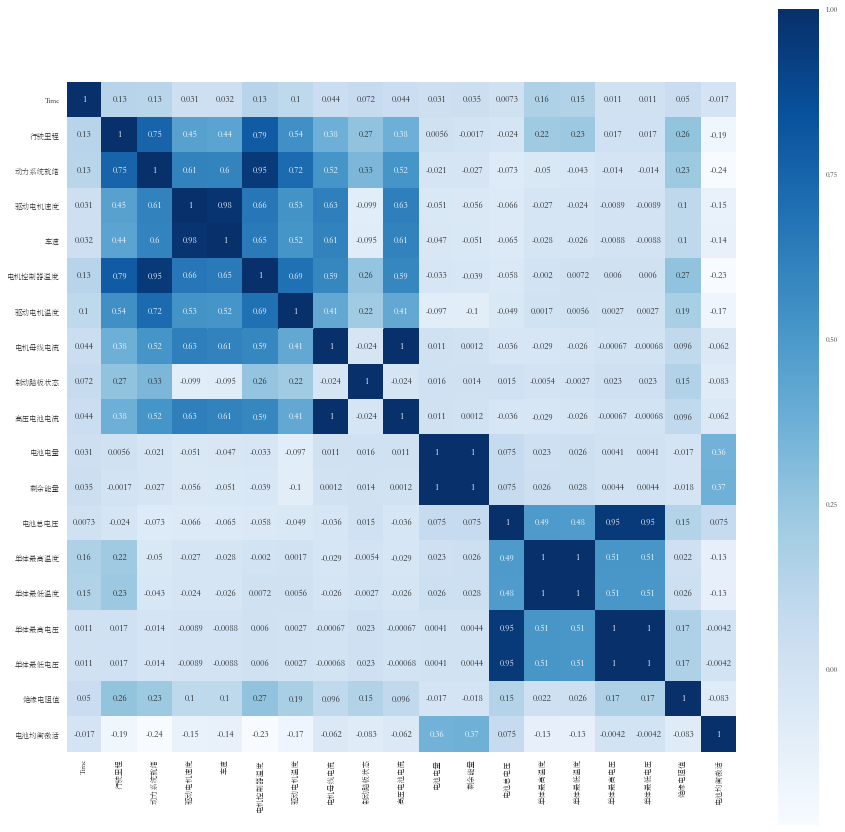

In [8]:
dfData = my_data.corr()
plt.subplots(figsize=(15, 15)) # 设置画面大小
sns.set(font_scale=0.75,font='STSong')
sns.heatmap(dfData,annot=True, vmax=1, square=True, cmap="Blues")
plt.savefig('./BluesStateRelation.png')
plt.show()

In [9]:
mydata_speed = my_data.copy()
mydata_speed = mydata_speed.drop(my_data.keys()[0],axis = 1)
mydata_speed = mydata_speed.drop(my_data.keys()[1],axis = 1)
mydata_speed = mydata_speed.drop(my_data.keys()[4],axis = 1)
mydata_speed = mydata_speed.drop(my_data.keys()[10],axis = 1)
mydata_speed = mydata_speed.drop(my_data.keys()[11],axis = 1)
mydata_speed = mydata_speed.drop(my_data.keys()[12],axis = 1)
mydata_speed = mydata_speed.drop(my_data.keys()[15],axis = 1)
mydata_speed = mydata_speed.drop(my_data.keys()[16],axis = 1)
mydata_speed = mydata_speed.drop(my_data.keys()[18],axis = 1)
mydata_miles = mydata_speed.copy()
mydata_speed = mydata_speed.drop(my_data.keys()[8],axis = 1)
mydata_speed = mydata_speed.drop(my_data.keys()[13],axis = 1)
mydata_speed = mydata_speed.drop(my_data.keys()[14],axis = 1)
mydata_speed = mydata_speed.drop(my_data.keys()[17],axis = 1)
mydata_speed.head()

,动力系统就绪,驱动电机速度,电机控制器温度,驱动电机温度,电机母线电流,高压电池电流
0,1,1891,51,25,67.08,67.08
1,1,2956,57,26,52.80,52.80
2,1,2454,42,28,-0.65,-0.65
3,1,3125,39,30,4.13,4.13
4,1,5250,55,32,76.67,76.67


In [10]:
mydata_miles.head()

,动力系统就绪,驱动电机速度,电机控制器温度,驱动电机温度,电机母线电流,制动踏板状态,高压电池电流,单体最高温度,单体最低温度,绝缘电阻值
0,1,1891,51,25,67.08,0,67.08,7.0,6.5,5162.5
1,1,2956,57,26,52.80,0,52.80,7.0,6.5,5022.5
2,1,2454,42,28,-0.65,0,-0.65,7.0,6.5,5032.5
3,1,3125,39,30,4.13,0,4.13,7.0,6.5,5110.0
4,1,5250,55,32,76.67,0,76.67,7.5,7.0,4960.0


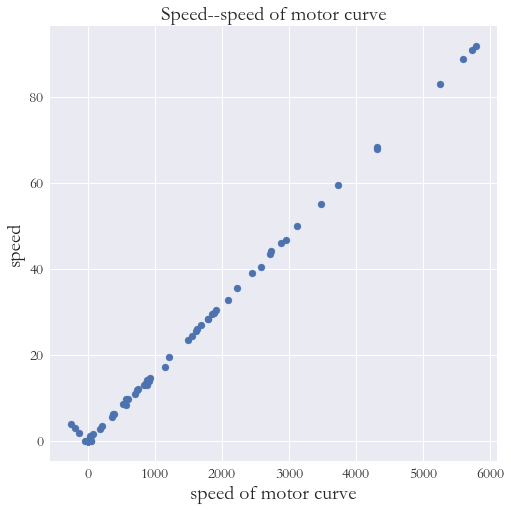

In [11]:
plt.figure(figsize=(8,8))
plt.scatter(mydata_speed[mydata_speed.keys()[1]][:400],my_data[my_data.keys()[4]][:400])
plt.title('Speed--speed of motor curve',fontsize=20)
ax = plt.subplot(111)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# 设置坐标标签字体大小
ax.set_xlabel('speed of motor curve',fontsize=20)
ax.set_ylabel("speed",fontsize=20)
plt.show()

F:\anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


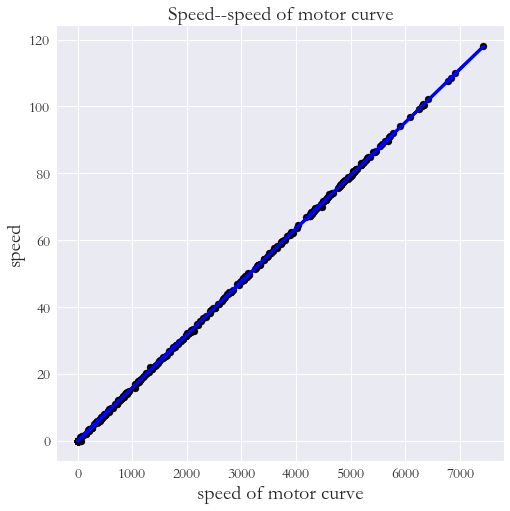

-0.00422741969128
[ 0.01587528]


In [12]:
from sklearn.linear_model import LinearRegression 
from sklearn.cross_validation import train_test_split
data_to_linear = my_data[my_data[mydata_speed.keys()[1]]>=0][0:10000]
data_to_linear = data_to_linear.reset_index(drop = True)
data_to_linear[[mydata_speed.keys()[1]]]
LinReg = LinearRegression()
X_trainset, X_testset, y_trainset, y_testset = train_test_split(data_to_linear[mydata_speed.keys()[1]],data_to_linear[my_data.keys()[4]], test_size=0.1, random_state=42)
X_trainset = X_trainset.values.reshape(-1,1)
LinReg.fit(X_trainset, y_trainset)
#plt.scatter(data_to_linear[mydata_speed.keys()[1]][:400],data_to_linear[my_data.keys()[4]][:400])
#plt.scatter(X_trainset,y_trainset)
plt.figure(figsize=(8,8))
plt.scatter(X_testset, y_testset, color='black')
X_testset = X_testset.values.reshape(-1,1)
plt.plot(X_testset, LinReg.predict(X_testset), color='blue', linewidth=3)
plt.title('Speed--speed of motor curve',fontsize=20)
ax = plt.subplot(111)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# 设置坐标标签字体大小
ax.set_xlabel('speed of motor curve',fontsize=20)
ax.set_ylabel("speed",fontsize=20)
plt.show()
print LinReg.intercept_
print LinReg.coef_

In [13]:
mydata_speed = mydata_speed.drop(mydata_speed.keys()[1],axis = 1)
mydata_speed.head()

,动力系统就绪,电机控制器温度,驱动电机温度,电机母线电流,高压电池电流
0,1,51,25,67.08,67.08
1,1,57,26,52.80,52.80
2,1,42,28,-0.65,-0.65
3,1,39,30,4.13,4.13
4,1,55,32,76.67,76.67


In [14]:
from time import time
ohdata = my_data[:8000]
speed = mydata_speed[:8000]
from sklearn import svm
from sklearn.metrics import fbeta_score, accuracy_score
learner = svm.SVC(random_state=0)
target = ohdata[ohdata.keys()[4]].copy()
target = target.astype(int)
X_trainset, X_testset, y_trainset, y_testset = train_test_split(speed,target, test_size=0.1, random_state=42)
start = time() # 获得程序开始时间
learner.fit(X_trainset,y_trainset)
end = time() # 获得程序结束时间
print "Score of SVM"
print learner.score(X_testset,y_testset)
print "Time used to train: "+str(end - start)

Score of SVM
0.71875
Time used to train: 33.0530002117


In [15]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)
target = my_data[ohdata.keys()[4]].copy()
target = target.astype(int)
X_trainset, X_testset, y_trainset, y_testset = train_test_split(mydata_speed,target, test_size=0.1, random_state=42)
start = time() # 获得程序开始时间
clf.fit(X_trainset,y_trainset)
end = time() # 获得程序结束时间
print "Score of Lasso"
print clf.score(X_testset,y_testset)
print "Time used to train: "+str(end - start)

Score of Lasso
0.520455185074
Time used to train: 0.125999927521


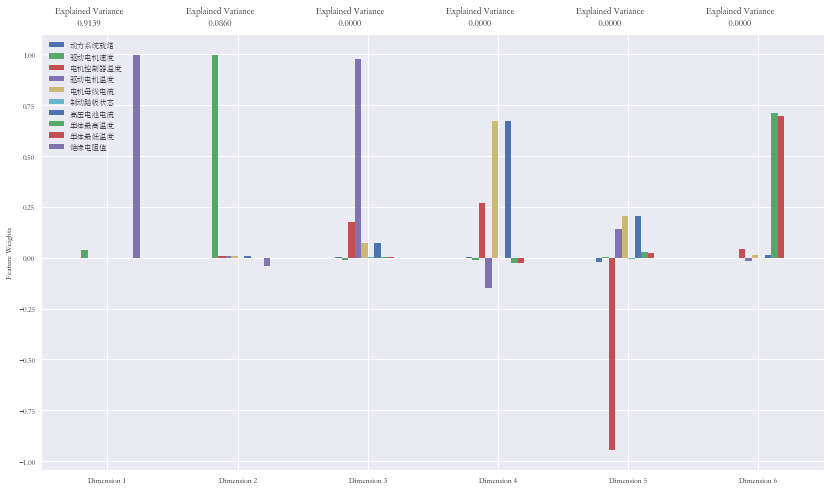

In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6).fit(mydata_miles[:15000])
pca_samples = pca.transform(mydata_miles)
pca_results = vs.pca_results(mydata_miles, pca)

In [17]:
display(pd.DataFrame(np.round(pca_samples[:5], 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,1254.2048,1050.3208,7.7731,83.8704,-1.1691,-10.1211
1,1155.9935,2119.6338,-5.1298,52.8661,-9.2796,-10.8103
2,1146.2560,1616.6726,-7.6096,-17.0446,-18.4252,-12.9721
3,1249.9689,2284.0929,-13.7314,-20.1600,-11.1826,-13.2845
4,1183.3778,4414.4151,-23.9673,54.7981,10.5383,-10.5590


In [18]:
pca = PCA(n_components=2).fit(mydata_miles[:15000])
reduced_data = pca.transform(mydata_miles[:15000])
pca_samples = pca.transform(mydata_miles)
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

In [19]:
display(pd.DataFrame(np.round(pca_samples[:5], 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,1254.2048,1050.3208
1,1155.9935,2119.6338
2,1146.2560,1616.6726
3,1249.9689,2284.0929
4,1183.3778,4414.4151


In [20]:
from sklearn import svm
from sklearn.metrics import fbeta_score, accuracy_score
learner = svm.SVC(random_state=0)
target = my_data[my_data.keys()[1]].copy()
target = target.astype(int)
X_trainset, X_testset, y_trainset, y_testset = train_test_split(pca_samples[:8000],target[:8000], test_size=0.1, random_state=42)
learner.fit(X_trainset,y_trainset)
print "Score of SVM"
print learner.score(X_testset,y_testset)

Score of SVM
0.60375


In [21]:
from sklearn import linear_model
leaner = linear_model.Lasso(alpha=0.1)
target = my_data[my_data.keys()[1]].copy()
target = target.astype(int)
X_trainset, X_testset, y_trainset, y_testset = train_test_split(pca_samples[:10000],target[:10000], test_size=0.1, random_state=42)
learner.fit(X_trainset,y_trainset)
print "Score of Lasso"
print learner.score(X_testset,y_testset)

Score of Lasso
0.607


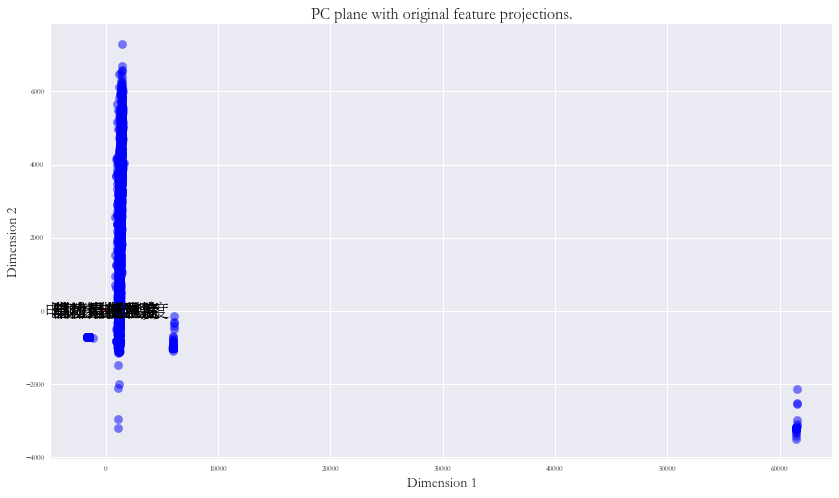

In [28]:
vs.biplot(mydata_miles[:15000], reduced_data, pca)